## Exploratory Data Analysis

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

In [21]:
tqdm.pandas()
df = pd.read_csv("../data/train.csv")
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [22]:
df.isnull().sum()/len(df)*100

timestamp    0.000000
Asset_ID     0.000000
Count        0.000000
Open         0.000000
High         0.000000
Low          0.000000
Close        0.000000
Volume       0.000000
VWAP         0.000037
Target       3.095862
dtype: float64

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()/len(df)*100

timestamp    0.0
Asset_ID     0.0
Count        0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Volume       0.0
VWAP         0.0
Target       0.0
dtype: float64

In [25]:
assets=pd.read_csv('../data/asset_details.csv',index_col=0).sort_index()

In [26]:
assets

,Weight,Asset_Name
Asset_ID,,
0,4.304065,Binance Coin
1,6.779922,Bitcoin
2,2.397895,Bitcoin Cash
3,4.406719,Cardano
4,3.555348,Dogecoin
5,1.386294,EOS.IO
6,5.894403,Ethereum
7,2.079442,Ethereum Classic
8,1.098612,IOTA


In [28]:
df["Weight"]=df['Asset_ID'].progress_apply(lambda x: assets.loc[x,"Weight"])

100%|██████████| 23486465/23486465 [02:24<00:00, 162219.92it/s]


C:\Users\Ashwin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Asset_ID', ylabel='count'>

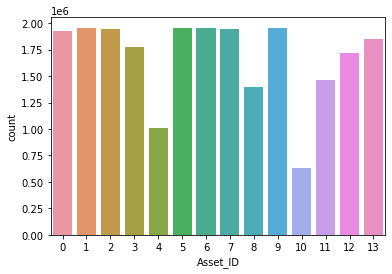

In [30]:
sns.countplot(df['Asset_ID'])

We seem to have very few samples for DogeCoin(4) and Maker(10). The rest seem more or less equally balanced with slight variations.